# Diagnóstico de Diabetes

Diabetes é uma doença é uma doença metabólica crônica, caracterizada pelo grau elevado de glicose (açucar) no sangue, causando danos severos ao coração, às veias, olhos e nervos, segundo a Organização Mundial da Saúde (OMS). Ainda de acordo com a OMS, 422 milhões de pessoas no mundo possuem diabetes e 1.6 milhões morrem todos os anos devido à diabetes.

Neste programa, o computador aprenderá a reconhecer os padrões importantes que caracterizam o diagnóstico de diabetes. Para isso, utilizamos uma série de dados organizados em uma tabela com vários indicadores de risco de diabetes, incluindo idade, pressão sanguínea, nível de glicose no sangue, etc.

| Nº gravidez | Glicose (mg/dL) | Pressão Sanguínea (mmHg) | Espessura da pele ($\mu$m) | Insulina | BMI | DPF | Idade | Resultado
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 6 | 148 | 72 | 35 | 0 | 33.6 | 627 | 50 | Sim |
|1 | 85 | 66 | 29 | 0 | 26.6 | 351 | 31 | Não |

Para o programa, nossa tabela de dados vai identificar "sim" como 1, e "não" como 0.

Começaremos o programa importanto os pacotes importantes para a criação da rede neural, treino, teste e avaliação dela. Para este programa, usamos o pacote "pandas" para importar nossos dados, o "numpy" para utilizar funções e conceitos matemáticos, o "matplotlib" para criar os gráficos necessários, o "keras" para importar bibliotecas que criam as redes neurais e as camadas delas e por ultimo o "scipy" para realizar integrais que eventualmente serão utilizadas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from scipy.integrate import simps

Using TensorFlow backend.


Com nossos pacotes prontos, precisamos começar importanto nossos dados com a biblioteca do "pandas". Para facilitar, já iremos transformar estes dados em um array numérico

In [3]:
Data = pd.read_csv("https://raw.githubusercontent.com/PedroHPCintra//Deep-Learning/master/Pima-Diabetes.csv")

#Transformar os dados em um array
Data = np.array(Data)

Perfeito, agora precisamos dividir estes dados em treino e teste, ou seja, parte destes dados serão usados para treinar a rede neural a identificar os padrões relevantes e outra parte dos dados será usada para testar a acurácia da nossa rede neural após o treino. Aqui, as 8 primeiras colunas dos nossos dados serão os parâmetros de avaliação e a 9º coluna compõe o gabarito. Também iremos dividir o tamanho da tabela da seguinte forma, 80% dos dados serão usados para treinar a rede neural e 20% para testa-la.

In [4]:
train_data = Data[:np.int(0.8*len(Data)),:8] #Train data
train_label = Data[:np.int(0.8*len(Data)),8] #Gabarito do treino

test_data = Data[np.int(0.8*len(Data)):,:8] #Dados de teste
test_label = Data[np.int(0.8*len(Data)):,8] #Gabarito do teste

Tudo ótimo até aqui, seguindo a diante, nossa próxima tarefa é construir a rede neural que irá avaliar os dados. O pacote "models" dentro do "keras" irá definir para nós o tipo de rede neural que construiremos enquanto o pacote "layers" nos permite definir cada camada da rede neural. Aqui usaremos uma rede neural sequencial, ou seja, as camadas estão organizadas em sequência. Usaremos camadas de rede densa, o que quer dizer que todos os neurônios da camada estão conectados à camada anterior. Nossa função de ativação do neurônio será uma sigmoide!

Além disso, também incluiremos camadas de dropout entre as camadas densas para evitar um overfitting. O dropout irá excluir aleatoriamente alguns neurônios, impedindo que os padrões aprendidos pela rede neural sejam específicos demais para os dados de treino. Basicamente, nós perdemos parte da informação para que nosso padrão encontrado seja generalizado o suficiente.

In [5]:
network = models.Sequential()
network.add(layers.Dense(1000, activation = 'sigmoid', input_shape = (8,)))
network.add(layers.Dropout(0.3))
network.add(layers.Dense(500, activation = 'sigmoid'))
network.add(layers.Dropout(0.2))
network.add(layers.Dense(1, activation = 'sigmoid'))
network.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

Vamos agora treinar a rede neural com os dados. Devemos determinar agora as épocas de treino. Na primeira época a rede neural atribuirá algumas condições iniciais para os pesos de cada uma das 8 variáveis, após o treino a rede irá encontrar um valor para os pesos que será mais adequado para o modelo. Na época seguinte, o programa irá avaliar os dados novamente, mas as condições iniciais serão aquelas que ele anterioremente achou como sendo mais adequadas. E assim por diante até ele terminar todas as épocas que determinamos.

Outro parâmetro importante é o "batch_size" que vai determinar a taxa de atualização dos pesos dados para cada entrada.

In [6]:
network.fit(train_data, train_label, epochs = 100, batch_size = 605)

Epoch 1/100
605/605 [==============================] - 3s 5ms/step - loss: 0.7636 - accuracy: 0.4347
Epoch 2/100
605/605 [==============================] - 0s 182us/step - loss: 1.0461 - accuracy: 0.6545
Epoch 3/100
605/605 [==============================] - 0s 89us/step - loss: 0.8289 - accuracy: 0.6545
Epoch 4/100
605/605 [==============================] - 0s 101us/step - loss: 0.6773 - accuracy: 0.5686
Epoch 5/100
605/605 [==============================] - 0s 104us/step - loss: 0.8524 - accuracy: 0.4050
Epoch 6/100
605/605 [==============================] - 0s 125us/step - loss: 0.6360 - accuracy: 0.6430
Epoch 7/100
605/605 [==============================] - 0s 166us/step - loss: 0.7019 - accuracy: 0.6545
Epoch 8/100
605/605 [==============================] - 0s 173us/step - loss: 0.7515 - accuracy: 0.6562
Epoch 9/100
605/605 [==============================] - 0s 107us/step - loss: 0.6532 - accuracy: 0.6612
Epoch 10/100
605/605 [==============================] - 0s 159us/step - loss

Após o treino, nossa rede neural acertou 77.7% das vezes. Legal, vamos agora testar o modelo nos dados de teste

In [7]:
test_loss, test_acc  = network.evaluate(test_data, test_label)
print('test_acc = ', test_acc)

152/152 [==============================] - 0s 3ms/step
test_acc =  0.7631579041481018


Após o teste, a rede neural acertou 76.3% dos resultados!

Uma outra forma de observarmos o desempenho da nossa rede é através da curva ROC. ROC quer dizer Reciever Operating Characteristic, e a curva ROC nos da a performance do nosso modelo em termos de dois parâmetros, a taxa de falso positivos (FPR) e a taxa de verdadeiros positivos (TPR).

Cada um deles é calculado da seguinte forma

$$TPR = \frac{TP}{TP + FN}$$

$$FPR = \frac{FP}{FP + TN}$$

A área embaixo da curva ROC nos da a porcentagem de previsões corretas pelo modelo

Text(0.5, 1.0, 'ROC curve')

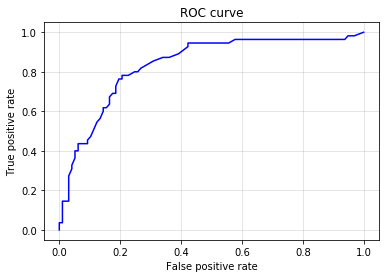

In [13]:
pred = network.predict(test_data) #gera previsões para os dados de teste

th = np.linspace(0, 1, 100) #crio um threshold the classificação que vai variar

def ROC(th, pred, test_label):
    FPR = np.zeros(len(th))
    TPR = np.zeros(len(th))
    
    N = pred[np.where(test_label == 0)]
    P = pred[np.where(test_label == 1)]
    
    for i in range(len(th)):
        FN = len(np.where(P <= th[i])[0])
        FP = len(np.where(N > th[i])[0])
        TN = len(np.where(N <= th[i])[0])
        TP = len(np.where(P > th[i])[0])
        
        FPR[i] = FP/(FP + TN)
        TPR[i] = TP/(TP + FN)
        
        result = np.concatenate((FPR, TPR)).reshape(2, len(th))
        
    return result[np.argsort(result[:,0])]

plt.grid(True, alpha = 0.4)
plt.plot(*ROC(th, pred, test_label), color = 'blue')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [16]:
roc = ROC(th, pred, test_label).T

# Exclui valores repetidos para a integração
r = roc[:1]
for i in range(1,len(roc)):

  if (roc[i,0] != roc[i-1,0]):

    r = np.append(r, roc[i])

# Curva ROC sem valores repetidos
roc = r.reshape((np.int(len(r)/2), 2))

S = -simps(roc[:,1], roc[:,0])
print('Área da curva: ', S)

Área da curva:  0.8391179839633448


## Referências

[1]. World Health Organization, Health Topics, Diabetes. https://www.who.int/health-topics/diabetes#tab=tab_1

[2]. Machine Learning Crash Course, Google. https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc